In [1]:
!pip install opencv-python-headless


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [5]:
from google.colab import files
uploaded = files.upload()


Saving Screenshot 2025-12-29 152512.png to Screenshot 2025-12-29 152512.png


In [7]:
img = cv2.imread(list(uploaded.keys())[0])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


In [9]:
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobel_x, sobel_y)

sobel = np.uint8(sobel)


In [10]:
kernelx = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
kernely = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])

prewitt_x = cv2.filter2D(gray, -1, kernelx)
prewitt_y = cv2.filter2D(gray, -1, kernely)
prewitt = cv2.add(prewitt_x, prewitt_y)


In [11]:
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))


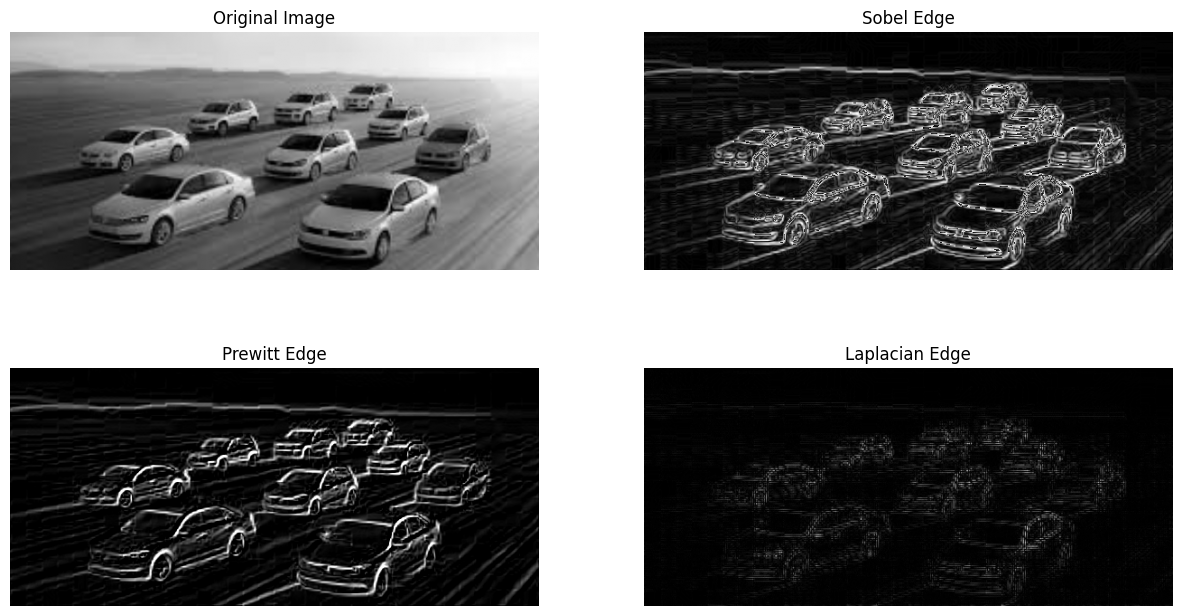

In [12]:
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.title("Original Image")
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(2,2,2)
plt.title("Sobel Edge")
plt.imshow(sobel, cmap='gray')
plt.axis('off')

plt.subplot(2,2,3)
plt.title("Prewitt Edge")
plt.imshow(prewitt, cmap='gray')
plt.axis('off')

plt.subplot(2,2,4)
plt.title("Laplacian Edge")
plt.imshow(laplacian, cmap='gray')
plt.axis('off')

plt.show()


In [13]:
blur_small = cv2.GaussianBlur(gray, (3,3), 0)
blur_large = cv2.GaussianBlur(gray, (7,7), 0)


In [14]:
canny_low = cv2.Canny(blur_small, 50, 100)
canny_high = cv2.Canny(blur_large, 100, 200)


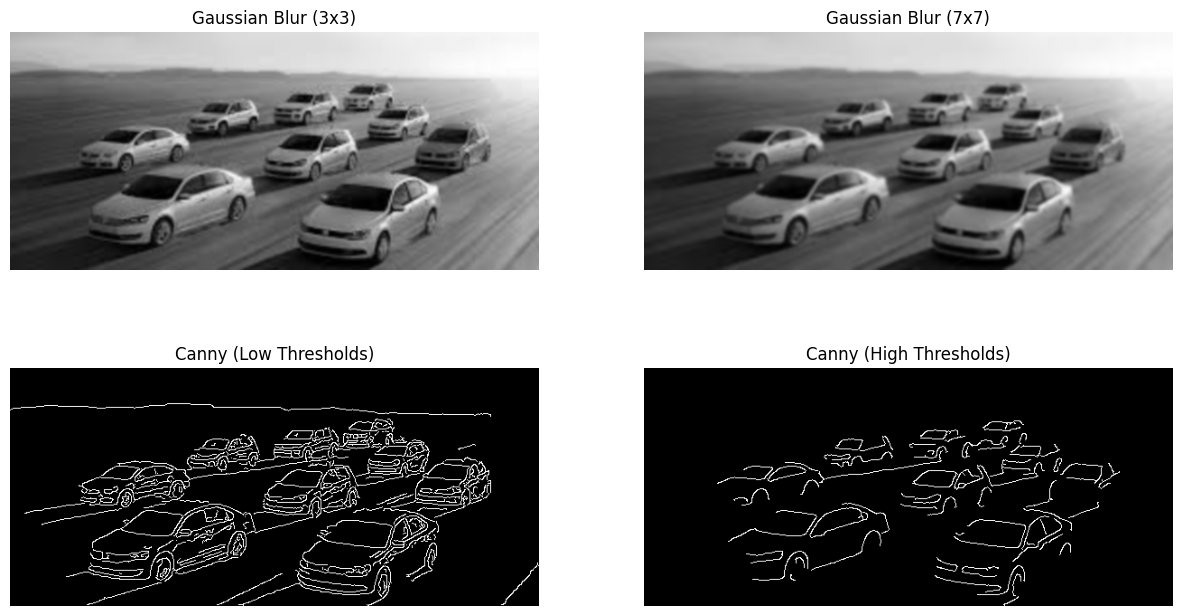

In [15]:
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.title("Gaussian Blur (3x3)")
plt.imshow(blur_small, cmap='gray')
plt.axis('off')

plt.subplot(2,2,2)
plt.title("Gaussian Blur (7x7)")
plt.imshow(blur_large, cmap='gray')
plt.axis('off')

plt.subplot(2,2,3)
plt.title("Canny (Low Thresholds)")
plt.imshow(canny_low, cmap='gray')
plt.axis('off')

plt.subplot(2,2,4)
plt.title("Canny (High Thresholds)")
plt.imshow(canny_high, cmap='gray')
plt.axis('off')

plt.show()
